# Pixel Map

Create a pixel map of crashes

In [5]:
import os
os.chdir('..')
from scripts.crash_data_analysis import CrashDataAnalysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.io.img_tiles import Stamen

In [2]:
cda = CrashDataAnalysis()

In [3]:
# Aggregate fatality crashes by year and day of year

query = """
select
reported_date
, st_x(geom_denver) as lon
, st_y(geom_denver) as lat

from crashes

where crash_date >= '2020-07-01'
and geom_denver is not null

order by crash_date
limit 100
"""

crash_points = pd.read_sql(query, cda.conn)
crash_points

,reported_date,lon,lat
0,2020-07-01 07:50:00+00:00,3.131827e+06,1.702469e+06
1,2020-07-01 19:16:00+00:00,3.142865e+06,1.677383e+06
2,2020-07-01 17:19:00+00:00,3.157034e+06,1.695092e+06
3,2020-07-01 22:40:00+00:00,3.170731e+06,1.656996e+06
4,2020-07-01 20:13:00+00:00,3.183704e+06,1.705821e+06
...,...,...,...
95,2020-07-02 17:10:00.000001+00:00,3.157924e+06,1.698935e+06
96,2020-07-02 17:04:00+00:00,3.129525e+06,1.700167e+06
97,2020-07-03 03:15:00+00:00,3.170460e+06,1.652828e+06
98,2020-07-03 04:50:00+00:00,3.138062e+06,1.679036e+06


In [ ]:
pixel_width_feet = 5280
crash_points['lon_bucket'] = np.round(crash_points.lon, pixel_width_feet)
crash_points['lat_bucket'] = np.round(crash_points.lat, pixel_width_feet)
crash_points['bucket'] = (crash_points.lon_bucket, crash_points.lat_bucket)
crash_points['pixel'] = crash_points['bucket'] + (pixel_width_feet / 2, pixel_width_feet / 2)

In [ ]:
pixels = sorted(crash_points.groupby('pixel').unique())

In [ ]:
# # For graphing, find the centroid of each pixel
# centroids_lon = crash_points.groupby('lon_bucket').unique() + 0.005
# centroids_lat = crash_points.groupby('lat_bucket').unique() + 0.005

# # Then cross the two series of centroids
# centroids_lon * centroids_lat

In [ ]:
crashes_in_pixel_by_month = (
    crash_points
    .groupby(['pixel', crash_points.reported_date.dt.strftime('%Y-%m')])
    .size()
    .reset_index()
)

crashes_in_pixel_median = crashes_in_pixel_by_month.groupby('year_month').num_crashes.median()

crashes_in_pixel_by_month = pd.merge(crashes_in_pixel_by_month, crashes_in_pixel_median, how='inner', on='pixel')

crashes_in_pixel_by_month['diff_from_median'] = (
    crashes_in_pixel_by_month.num_crashes - crashes_in_pixel_by_month_median
)

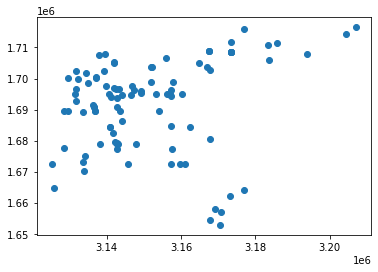

In [4]:
plt.scatter(x=crash_points.lon, y=crash_points.lat)

In [5]:
imagery = Stamen(style='toner-lite', cache=True)
imagery.crs = ccrs.epsg('3502')

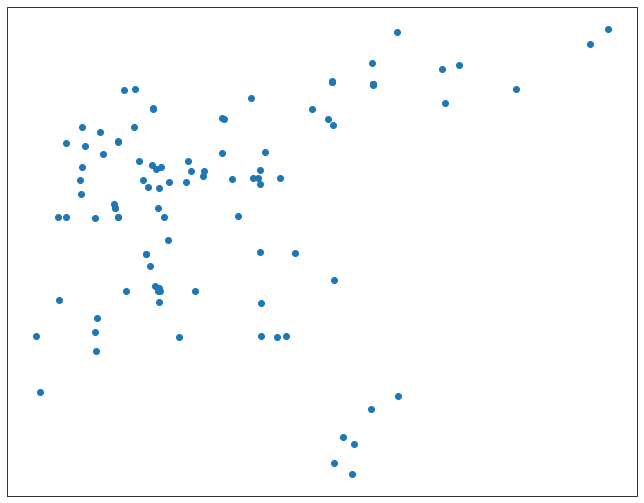

In [10]:
fig = plt.figure(figsize=[16,9])

# fig.subplots_adjust(left=0, bottom=0.05, right=0.7, top=0.95)

ax = plt.axes(projection=imagery.crs)
# ax.set_extent((bounds['left'], bounds['right'], bounds['bottom'], bounds['top']))

ax.scatter(crash_points.lon, crash_points.lat)

In [7]:
dir(imagery)

['_MAX_THREADS',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_cache_dir',
 '_default_cache',
 '_find_images',
 '_image_url',
 '_load_cache',
 '_subtiles',
 '_tileextent',
 'cache',
 'cache_path',
 'crs',
 'desired_tile_form',
 'find_images',
 'get_image',
 'image_for_domain',
 'imgs',
 'style',
 'subtiles',
 'tile_bbox',
 'tileextent',
 'user_agent']

In [8]:
ccrs.epsg('3502')

_EPSGProjection(3502)

In [4]:
3.131827e+06

3131827.0

In [13]:
np.round(9876543.1234,-2)

9876500.0

In [14]:
3131827 % 5280

787